In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import time
import FinanceDataReader as fdr

import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [63]:
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [28]:
df_krx.shape

(7307, 10)

# 영업이익 적자 기업 크롤링

In [64]:
df_k = df_krx[(df_krx['Market']=='KOSDAQ')]
df_k

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시
54,032790,KOSDAQ,BNGT,기계장비 및 관련 물품 도매업,"Bio 이종장기 사업, ICT 프린터 현상기",1997-06-26,12월,조상환,http://www.mgenplus.com,서울특별시
...,...,...,...,...,...,...,...,...,...,...
7579,024060,KOSDAQ,흥구석유,기타 전문 도매업,휘발유등,1994-12-07,12월,김상우,NaN,대구광역시
7580,010240,KOSDAQ,흥국,특수 목적용 기계 제조업,굴삭기 Roller 및 형단조품,2009-05-12,12월,류명준,http://www.heungkuk.co.kr,충청남도
7581,189980,KOSDAQ,흥국에프엔비,비알코올음료 및 얼음 제조업,"과일음료(에이드베이스, 스무디, 착즙쥬스 등)",2015-08-07,12월,"박철범, 오길영",http://www.hyungkuk.com,서울특별시
7586,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시


In [66]:
df_k1 = df_k[~df_k['Sector'].isnull()]
df_k1

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시
54,032790,KOSDAQ,BNGT,기계장비 및 관련 물품 도매업,"Bio 이종장기 사업, ICT 프린터 현상기",1997-06-26,12월,조상환,http://www.mgenplus.com,서울특별시
...,...,...,...,...,...,...,...,...,...,...
7579,024060,KOSDAQ,흥구석유,기타 전문 도매업,휘발유등,1994-12-07,12월,김상우,NaN,대구광역시
7580,010240,KOSDAQ,흥국,특수 목적용 기계 제조업,굴삭기 Roller 및 형단조품,2009-05-12,12월,류명준,http://www.heungkuk.co.kr,충청남도
7581,189980,KOSDAQ,흥국에프엔비,비알코올음료 및 얼음 제조업,"과일음료(에이드베이스, 스무디, 착즙쥬스 등)",2015-08-07,12월,"박철범, 오길영",http://www.hyungkuk.com,서울특별시
7586,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시


In [67]:
earning19 = []
earning20 = []
earning21 = []
code_list = []
name_list = []
listing_date = []

count = -1
for code in df_k1['Symbol']:
    count += 1
    print(count)
    # iframe url
    url = 'https://navercomp.wisereport.co.kr/v2/company/c1010001.aspx?cmp_cd={}'.format(code)
    driver = webdriver.Chrome()
    driver.get(url)
    time.sleep(0.3)
    try:
        html = driver.page_source
        df = pd.read_html(html)[12]
        earning19.append(df.iloc[1,1])
        earning20.append(df.iloc[1,2])
        earning21.append(df.iloc[1,3])
        code_list.append(code)
    
        name = df_k[df_k['Symbol']== str(code)]['Name'].iloc[0]
        name_list.append(name)
    
        date = df_k[df_k['Symbol']== str(code)]['ListingDate'].iloc[0]
        listing_date.append(date)
        
    except:
        print(code)
        print('스킵')



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [69]:
df_earning = pd.DataFrame({'회사코드': code_list,'회사이름':name_list,'상장일':listing_date,'2019년영업이익':earning19, '2020년영업이익':earning20, '2021년영업이익':earning21 })
df_earning.to_csv('./data/코스닥영업이익.csv')
df_earning


,회사코드,회사이름,상장일,2019년영업이익,2020년영업이익,2021년영업이익
0,060310,3S,2002-04-23,17.0,5.0,-14.0
1,054620,APS홀딩스,2001-12-04,-106.0,-109.0,-40.0
2,265520,AP시스템,2017-04-07,284.0,463.0,643.0
3,211270,AP위성,2016-03-04,71.0,44.0,8.0
4,032790,BNGT,1997-06-26,-34.0,-3.0,1.0
...,...,...,...,...,...,...
1549,024060,흥구석유,1994-12-07,5.0,-5.0,0.0
1550,010240,흥국,2009-05-12,89.0,156.0,138.0
1551,189980,흥국에프엔비,2015-08-07,58.0,25.0,67.0
1552,037440,희림,2000-02-03,72.0,91.0,83.0


In [79]:
df_minus = df_earning[(df_earning['2019년영업이익']<0) & (df_earning['2020년영업이익']<0) & (df_earning['2021년영업이익']<0)]
df_minus

,회사코드,회사이름,상장일,2019년영업이익,2020년영업이익,2021년영업이익
1,054620,APS홀딩스,2001-12-04,-106.0,-109.0,-40.0
7,311690,CJ 바이오사이언스,2019-12-26,-45.0,-85.0,-101.0
11,056730,CNT85,2002-01-04,-35.0,-48.0,-2.0
19,245620,EDGC,2018-06-26,-86.0,-51.0,-156.0
22,084180,EV수성,2005-12-16,-11.0,-7.0,-5.0
...,...,...,...,...,...,...
1510,002680,한탑,1995-07-07,-78.0,-103.0,-46.0
1514,059270,해성티피씨,2021-04-21,-13.0,-3.0,-11.0
1517,084990,헬릭스미스,2005-12-29,-417.0,-551.0,-485.0
1530,064240,홈캐스트,2003-06-11,-89.0,-20.0,-46.0


In [80]:
df_minus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 1 to 1537
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   회사코드       218 non-null    object        
 1   회사이름       218 non-null    object        
 2   상장일        218 non-null    datetime64[ns]
 3   2019년영업이익  218 non-null    float64       
 4   2020년영업이익  218 non-null    float64       
 5   2021년영업이익  218 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 11.9+ KB


In [100]:
df_minus1 = df_minus[df_minus['상장일']<= '2014-01-01']
df_minus1

,회사코드,회사이름,상장일,2019년영업이익,2020년영업이익,2021년영업이익
1,054620,APS홀딩스,2001-12-04,-106.0,-109.0,-40.0
11,056730,CNT85,2002-01-04,-35.0,-48.0,-2.0
22,084180,EV수성,2005-12-16,-11.0,-7.0,-5.0
30,028300,HLB,1996-07-27,-487.0,-613.0,-1010.0
31,067630,HLB생명과학,2008-11-25,-45.0,-81.0,-185.0
...,...,...,...,...,...,...
1504,123840,한일진공,2010-10-05,-84.0,-87.0,-74.0
1510,002680,한탑,1995-07-07,-78.0,-103.0,-46.0
1517,084990,헬릭스미스,2005-12-29,-417.0,-551.0,-485.0
1530,064240,홈캐스트,2003-06-11,-89.0,-20.0,-46.0


# 적자기업 주가 크롤링

In [85]:
import FinanceDataReader as fdr

In [89]:
df_p = fdr.DataReader('084180','2015','2022')
df_p

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2015-01-02,1162,1162,1113,1153,15386,-0.005177
2015-01-05,1119,1152,1109,1131,5018,-0.019081
2015-01-06,1139,1139,1100,1136,5152,0.004421
2015-01-07,1142,1175,1116,1174,2464,0.033451
2015-01-08,1173,1180,1142,1146,812,-0.023850
...,...,...,...,...,...,...
2021-12-24,2005,2130,1990,2045,2028299,0.030227
2021-12-27,2010,2040,1845,1865,1907977,-0.088020
2021-12-28,1870,1925,1810,1870,688542,0.002681


(array([  1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          2.,   0.,   1.,   1.,   2.,   0.,   0.,   2.,   3.,   1.,   0.,
          6.,   3.,   9.,   2.,   9.,  13.,  11.,  12.,  25.,  30.,  38.,
         44.,  52.,  74.,  77., 126., 550., 126., 100.,  79.,  67.,  45.,
         38.,  29.,  32.,  18.,  17.,   9.,   6.,   7.,   5.,   4.,   9.,
          3.,   2.,   5.,   1.,   5.,   3.,   0.,   2.,   1.,   1.,   0.,
          0.,   1.,   1.,   0.,   2.,   1.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          5.]),
 array([-0.29899085, -0.29300094, -0.28701103, -0.28102112, -0.27503121,
        -0.2690413 , -0.2630514 , -0.25706149, -0.25107158, -0.24508167,
        -0.23909176, -0.23310185, -0.22711195, -0.22112204, -0.21513213,
        -0.20914222, -0.20315231, -0.1971624 , -0.19117249, -0.18518259,
        -0.17919268, -0.17

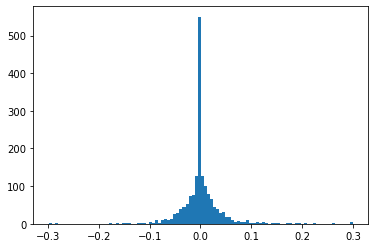

In [92]:
plt.hist(df_p['Change'], bins=100)

In [94]:
df_p[(df_p['Change']==0) & (df_p['Volume']==0)]

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-09,0,0,0,1636,0,0.0
2018-03-19,0,0,0,1900,0,0.0
2018-03-20,0,0,0,1900,0,0.0
2018-03-21,0,0,0,1900,0,0.0
2018-03-22,0,0,0,1900,0,0.0
...,...,...,...,...,...,...
2019-08-21,0,0,0,1900,0,0.0
2019-08-22,0,0,0,1900,0,0.0
2019-08-23,0,0,0,1900,0,0.0


In [95]:
df_p[df_p['Volume']==0]

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-09,0,0,0,1636,0,0.0
2018-03-19,0,0,0,1900,0,0.0
2018-03-20,0,0,0,1900,0,0.0
2018-03-21,0,0,0,1900,0,0.0
2018-03-22,0,0,0,1900,0,0.0
...,...,...,...,...,...,...
2019-08-21,0,0,0,1900,0,0.0
2019-08-22,0,0,0,1900,0,0.0
2019-08-23,0,0,0,1900,0,0.0


# 기술적 지표

## 추세지표: MACD, MACD Oscilator

* MACD: 12일 지수이동평균선(12일EMA) - 26일 지수이동평균선(26일EMA)
* MACD Signal = MACD의 9일 단순이동평균선
* MACD Oscilator = MACD Signal 값을 막대로 표현한 보조지표

In [104]:
df_p['MACD'] = df_p['Close'].ewm(span= 12).mean()
df_p['MACD_Signal'] = df_p['MACD'].ewm(span= 26).mean()
df_p['MACD_Oscilator'] = df_p['MACD'] - df_p['MACD_Signal']
df_p

,Open,High,Low,Close,Volume,Change,L5,H5,%K,%D,MACD,MACD_Signal,MACD_Oscilator
Date,,,,,,,,,,,,,
2015-01-02,1162,1162,1113,1153,15386,-0.005177,NaN,NaN,NaN,NaN,1153.000000,1153.000000,0.000000
2015-01-05,1119,1152,1109,1131,5018,-0.019081,NaN,NaN,NaN,NaN,1141.083333,1146.812500,-5.729167
2015-01-06,1139,1139,1100,1136,5152,0.004421,NaN,NaN,NaN,NaN,1139.099307,1144.041225,-4.941918
2015-01-07,1142,1175,1116,1174,2464,0.033451,NaN,NaN,NaN,NaN,1150.116092,1145.739492,4.376600
2015-01-08,1173,1180,1142,1146,812,-0.023850,1131.0,1174.0,34.883721,NaN,1148.997764,1146.495099,2.502666
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,2005,2130,1990,2045,2028299,0.030227,1985.0,2250.0,22.641509,40.880503,2005.571398,1845.624073,159.947326
2021-12-27,2010,2040,1845,1865,1907977,-0.088020,1865.0,2250.0,0.000000,7.547170,1983.945029,1855.870070,128.074960
2021-12-28,1870,1925,1810,1870,688542,0.002681,1865.0,2250.0,1.298701,7.980070,1966.415025,1864.058585,102.356440


## 모멘텀지표: 스토케스틱

* 스토케스틱<br>
C=최근종가, L5= 과거5일 동안의 최저점, H5= 과거5일 동안의 최고점<br>

%k = (C-L5)/(H5-L5)*100% <br> 
%D = (%k(t-2) + %K(t-1) + %K(t)) /3 <br>

%K 
1. %D선을 통과하는가
2. %K의 수준
85이상: 과매수 구간 매도사인<br>
70이상: 일반적 상승추세<br>
30이하: 일반적 하락추세<br>
15이하: 과매도 구간 매수사인

In [97]:
# L5
df_p['L5'] = df_p['Close'].rolling(5).min()
df_p

,Open,High,Low,Close,Volume,Change,L5
Date,,,,,,,
2015-01-02,1162,1162,1113,1153,15386,-0.005177,NaN
2015-01-05,1119,1152,1109,1131,5018,-0.019081,NaN
2015-01-06,1139,1139,1100,1136,5152,0.004421,NaN
2015-01-07,1142,1175,1116,1174,2464,0.033451,NaN
2015-01-08,1173,1180,1142,1146,812,-0.023850,1131.0
...,...,...,...,...,...,...,...
2021-12-24,2005,2130,1990,2045,2028299,0.030227,1985.0
2021-12-27,2010,2040,1845,1865,1907977,-0.088020,1865.0
2021-12-28,1870,1925,1810,1870,688542,0.002681,1865.0


In [98]:
# H5
df_p['H5'] = df_p['Close'].rolling(5).max()
df_p

,Open,High,Low,Close,Volume,Change,L5,H5
Date,,,,,,,,
2015-01-02,1162,1162,1113,1153,15386,-0.005177,NaN,NaN
2015-01-05,1119,1152,1109,1131,5018,-0.019081,NaN,NaN
2015-01-06,1139,1139,1100,1136,5152,0.004421,NaN,NaN
2015-01-07,1142,1175,1116,1174,2464,0.033451,NaN,NaN
2015-01-08,1173,1180,1142,1146,812,-0.023850,1131.0,1174.0
...,...,...,...,...,...,...,...,...
2021-12-24,2005,2130,1990,2045,2028299,0.030227,1985.0,2250.0
2021-12-27,2010,2040,1845,1865,1907977,-0.088020,1865.0,2250.0
2021-12-28,1870,1925,1810,1870,688542,0.002681,1865.0,2250.0


In [99]:
# %K 만들기: (C-L5)/(H5-L5)*100%
df_p['%K'] = (df_p['Close']-df_p['L5'])*100/(df_p['H5']-df_p['L5'])
df_p

,Open,High,Low,Close,Volume,Change,L5,H5,%K
Date,,,,,,,,,
2015-01-02,1162,1162,1113,1153,15386,-0.005177,NaN,NaN,NaN
2015-01-05,1119,1152,1109,1131,5018,-0.019081,NaN,NaN,NaN
2015-01-06,1139,1139,1100,1136,5152,0.004421,NaN,NaN,NaN
2015-01-07,1142,1175,1116,1174,2464,0.033451,NaN,NaN,NaN
2015-01-08,1173,1180,1142,1146,812,-0.023850,1131.0,1174.0,34.883721
...,...,...,...,...,...,...,...,...,...
2021-12-24,2005,2130,1990,2045,2028299,0.030227,1985.0,2250.0,22.641509
2021-12-27,2010,2040,1845,1865,1907977,-0.088020,1865.0,2250.0,0.000000
2021-12-28,1870,1925,1810,1870,688542,0.002681,1865.0,2250.0,1.298701


In [102]:
# %D 만들기: %D = (%k(t-2) + %K(t-1) + %K(t)) /3
df_p['%D'] = df_p['%K'].rolling(3).sum()/3
df_p

,Open,High,Low,Close,Volume,Change,L5,H5,%K,%D
Date,,,,,,,,,,
2015-01-02,1162,1162,1113,1153,15386,-0.005177,NaN,NaN,NaN,NaN
2015-01-05,1119,1152,1109,1131,5018,-0.019081,NaN,NaN,NaN,NaN
2015-01-06,1139,1139,1100,1136,5152,0.004421,NaN,NaN,NaN,NaN
2015-01-07,1142,1175,1116,1174,2464,0.033451,NaN,NaN,NaN,NaN
2015-01-08,1173,1180,1142,1146,812,-0.023850,1131.0,1174.0,34.883721,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-12-24,2005,2130,1990,2045,2028299,0.030227,1985.0,2250.0,22.641509,40.880503
2021-12-27,2010,2040,1845,1865,1907977,-0.088020,1865.0,2250.0,0.000000,7.547170
2021-12-28,1870,1925,1810,1870,688542,0.002681,1865.0,2250.0,1.298701,7.980070


## 변동성지표:  볼린져밴드

In [106]:
df_p['20ma'] = df_p['Close'].rolling(20).mean()
df_p['20std'] = df_p['Close'].rolling(20).std()
df_p['upper_b'] = df_p['20ma'] + (df_p['20std']*2)
df_p['lower_b'] = df_p['20ma'] - (df_p['20std']*2)
df_p

,Open,High,Low,Close,Volume,Change,L5,H5,%K,%D,MACD,MACD_Signal,MACD_Oscilator,20ma,20std,upper_b,lower_b
Date,,,,,,,,,,,,,,,,,
2015-01-02,1162,1162,1113,1153,15386,-0.005177,NaN,NaN,NaN,NaN,1153.000000,1153.000000,0.000000,NaN,NaN,NaN,NaN
2015-01-05,1119,1152,1109,1131,5018,-0.019081,NaN,NaN,NaN,NaN,1141.083333,1146.812500,-5.729167,NaN,NaN,NaN,NaN
2015-01-06,1139,1139,1100,1136,5152,0.004421,NaN,NaN,NaN,NaN,1139.099307,1144.041225,-4.941918,NaN,NaN,NaN,NaN
2015-01-07,1142,1175,1116,1174,2464,0.033451,NaN,NaN,NaN,NaN,1150.116092,1145.739492,4.376600,NaN,NaN,NaN,NaN
2015-01-08,1173,1180,1142,1146,812,-0.023850,1131.0,1174.0,34.883721,NaN,1148.997764,1146.495099,2.502666,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,2005,2130,1990,2045,2028299,0.030227,1985.0,2250.0,22.641509,40.880503,2005.571398,1845.624073,159.947326,1912.75,147.786074,2208.322148,1617.177852
2021-12-27,2010,2040,1845,1865,1907977,-0.088020,1865.0,2250.0,0.000000,7.547170,1983.945029,1855.870070,128.074960,1917.75,144.171636,2206.093271,1629.406729
2021-12-28,1870,1925,1810,1870,688542,0.002681,1865.0,2250.0,1.298701,7.980070,1966.415025,1864.058585,102.356440,1925.50,136.669983,2198.839966,1652.160034


## 시장강도(거래량) 지표: OBV, AD

* OBV : 전일 종가보다 금일 종가가 상승하면 오늘 거래량을 더하고 반대로 하락하면 오늘 거래량을 빼주어 누적계산

* AD: 당일 주가 변동폭의 중간 값에 대한 종가의 비율을 당일 거래량에 곱한 수치를 누적계산

In [110]:
# OBV
OBV = []
OBV.append(0)

for i in range(1,len(df_p)):
    if df_p['Close'].iloc[i] > df_p['Close'].iloc[i-1]:
        OBV.append(OBV[-1] + df_p['Volume'].iloc[i])
    elif df_p['Close'].iloc[i] < df_p['Close'].iloc[i-1]:
        OBV.append(OBV[-1] - df_p['Volume'].iloc[i])
    else:
        OBV.append(OBV[-1])
        
df_p['OBV'] = OBV
df_p['OBV_EMA'] = df_p['OBV'].ewm(span=20).mean()

In [111]:
 df_p

,Open,High,Low,Close,Volume,Change,L5,H5,%K,%D,MACD,MACD_Signal,MACD_Oscilator,20ma,20std,upper_b,lower_b,OBV,OBV_EMA
Date,,,,,,,,,,,,,,,,,,,
2015-01-02,1162,1162,1113,1153,15386,-0.005177,NaN,NaN,NaN,NaN,1153.000000,1153.000000,0.000000,NaN,NaN,NaN,NaN,0,0.000000e+00
2015-01-05,1119,1152,1109,1131,5018,-0.019081,NaN,NaN,NaN,NaN,1141.083333,1146.812500,-5.729167,NaN,NaN,NaN,NaN,-5018,-2.634450e+03
2015-01-06,1139,1139,1100,1136,5152,0.004421,NaN,NaN,NaN,NaN,1139.099307,1144.041225,-4.941918,NaN,NaN,NaN,NaN,134,-1.617892e+03
2015-01-07,1142,1175,1116,1174,2464,0.033451,NaN,NaN,NaN,NaN,1150.116092,1145.739492,4.376600,NaN,NaN,NaN,NaN,2598,-4.008290e+02
2015-01-08,1173,1180,1142,1146,812,-0.023850,1131.0,1174.0,34.883721,NaN,1148.997764,1146.495099,2.502666,NaN,NaN,NaN,NaN,1786,1.281463e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,2005,2130,1990,2045,2028299,0.030227,1985.0,2250.0,22.641509,40.880503,2005.571398,1845.624073,159.947326,1912.75,147.786074,2208.322148,1617.177852,136212926,1.300017e+08
2021-12-27,2010,2040,1845,1865,1907977,-0.088020,1865.0,2250.0,0.000000,7.547170,1983.945029,1855.870070,128.074960,1917.75,144.171636,2206.093271,1629.406729,134304949,1.304115e+08
2021-12-28,1870,1925,1810,1870,688542,0.002681,1865.0,2250.0,1.298701,7.980070,1966.415025,1864.058585,102.356440,1925.50,136.669983,2198.839966,1652.160034,134993491,1.308479e+08
